<a href="https://colab.research.google.com/github/vivekkishore/Pythonbasics/blob/main/momclsfn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###import modules and dataset

In [1]:
# import pandas as pd
# import numpy as np
# import seaborn
# import sklearn
# import matplotlib.pyplot as plt
# %matplotlib inline
# from pylab import rcParams
# rcParams['figure.figsize'] = 10, 8
# from sklearn.model_selection import train_test_split,RandomizedSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn import preprocessing
# !pip install scikit-plot
# import scikitplot
# from sklearn.cluster import KMeans,AgglomerativeClustering, SpectralClustering

# import warnings
# warnings.filterwarnings('ignore')
# from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer,CountVectorizer

# df=pd.read_excel('mom classification.xlsx')
# df.head()


,MOM points,Meeting Script
0,Discussed and prioritized user stories for the...,User story 1 is more important cosidering it i...
1,Shared best practices for continuous improveme...,We should implement regular retrospectives to ...
2,Discussed and refined user stories for Project...,User story 2 needs further clarification on ac...
3,Shared progress updates to kick off the new pr...,"We're on track with our progress milestones, b..."
4,Conducted a comprehensive review of the comple...,"During the review, it was evident that the tea..."


###Data preprocessing

In [2]:
import spacy
import string
import gensim
import operator
import re
from spacy.lang.en.stop_words import STOP_WORDS
spacy_nlp = spacy.load('en_core_web_sm')

def spacy_processor(sentence):

    punctuations = string.punctuation
    stop_words = STOP_WORDS
    #remove distracting single quotes
    sentence = re.sub('\'','',sentence)

    #remove digits and words containing digits
    sentence = re.sub('\w*\d\w*','',sentence)

    #replace extra spaces with single space
    sentence = re.sub(' +',' ',sentence)

    #remove non-breaking new line characters
    sentence = re.sub(r'\n',' ',sentence)

    #creating token object
    tokens = spacy_nlp(sentence)

    #lower, strip and lemmatize
    tokens = [word.lemma_.lower().strip() for word in tokens]

    #remove stopwords, and exclude words less than 2 characters
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations and len(word) > 2]

    sent=' '.join(tokens)

    return sent


In [5]:
X = df['MOM points'].map(lambda x: spacy_processor(x))
# X.head()
X=pd.DataFrame(X)
X.head()

,MOM points
0,discuss prioritized user story upcoming sprint...
1,share good practice continuous improvement agi...
2,discuss refined user story project xyz backlog...
3,share progress update kick new project success...
4,conduct comprehensive review complete sprint d...


In [24]:
text_model = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer())])
# X_transformed=text_model.fit_transform(X['MOM points'])
text_model.fit(X['MOM points'])
X_transformed=text_model.transform(X['MOM points'])
X_arr1=X_transformed.toarray()
feature_names=text_model.get_feature_names_out()
X_df1=pd.DataFrame(X_arr1,columns=feature_names)
X_df1

,acceptance,access,accuracy,achieve,action,actionable,active,activity,additional,address,...,user,utilization,vendor,verification,verify,vulnerability,way,work,workshop,xyz
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.206103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.170795,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.155493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220731
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.167084,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.203865,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.158802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.225429,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.176591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.251603,0.000000,0.000000,0.00000,0.000000,...,0.354480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


###countvectorizer and tfidf stepwise

In [ ]:
# Count=CountVectorizer()
# X_count=Count.fit_transform(X['MOM points'])

# X_count_arr=X_count.toarray()
# feature_names=Count.get_feature_names_out()

# df_count=pd.DataFrame(X_count_arr,columns=feature_names)
# df_count

In [ ]:
# tfidf=TfidfTransformer()
# X_final=tfidf.fit_transform(df_count)

# X_final_arr=X_final.toarray()
# X_final_df=pd.DataFrame(X_final_arr,columns=feature_names)
# X_final_df

###Unsupervised

In [9]:
# prompt: using unsupervised learning to cluster rows part of X_df1 dataframe

from sklearn.cluster import KMeans

# Initialize the KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(X_df1)

# Predict the cluster labels for each data point
cluster_labels = kmeans.predict(X_df1)

cluster_labels

# # Add the cluster labels to the dataframe
# X_df1['Cluster'] = cluster_labels

# # Print the dataframe with cluster labels
# X_df1['Cluster'] = cluster_labels
# print(X_df1['Cluster'])


array([4, 3, 4, 4, 0, 1, 4, 4, 4, 4, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 4, 0, 3, 0, 3, 3, 3, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 2], dtype=int32)

<Axes: title={'center': 'Elbow Plot'}, xlabel='Number of clusters', ylabel='Sum of Squared Errors'>

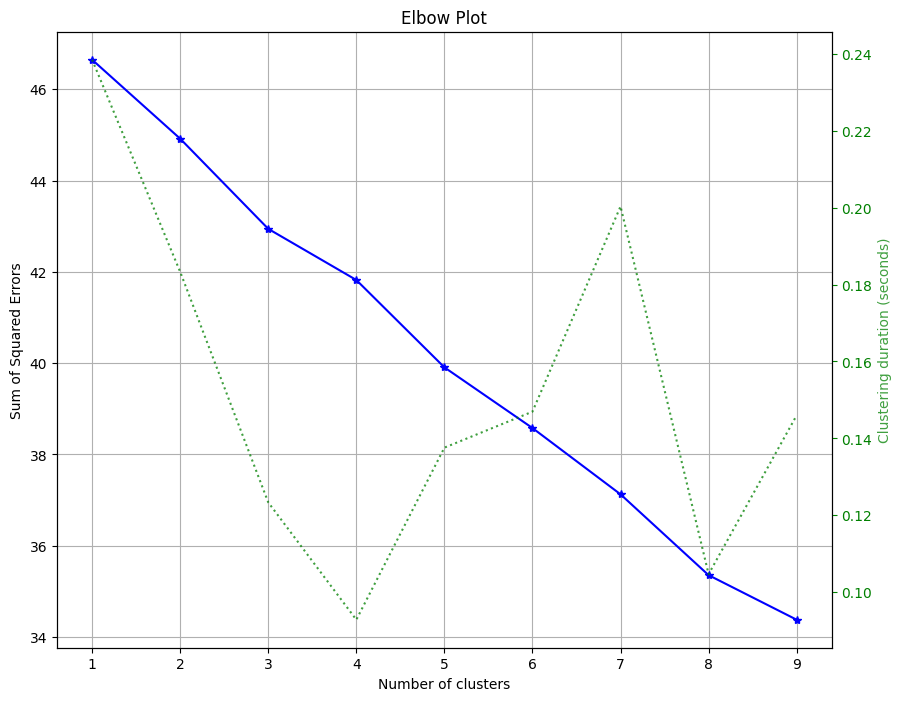

In [ ]:
Kmeans_elbow_check=KMeans()
scikitplot.cluster.plot_elbow_curve(Kmeans_elbow_check, X=X_df1, cluster_ranges=range(1, 10))

In [8]:
hierarchical_clustering1 = SpectralClustering(n_clusters=5, affinity="nearest_neighbors")
hierarchical_clustering1.fit(X_df1)
cluster_assignment = hierarchical_clustering1.labels_

cluster_assignment



array([0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0], dtype=int32)

In [10]:
cluster_labels

array([4, 3, 4, 4, 0, 1, 4, 4, 4, 4, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 4, 0, 3, 0, 3, 3, 3, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 2], dtype=int32)

###Script clustering - Preprocessing, Unsupervised model , Fit separately

In [4]:
X1 = df['Meeting Script'].map(lambda x: spacy_processor(x))
# X1.head()
X1=pd.DataFrame(X1)
X1.head()

,Meeting Script
0,user story important cosidering include reques...
1,implement regular retrospective identify area ...
2,user story need clarification acceptance crite...
3,track progress milestone need address connecti...
4,review evident team excel meet sprint goal par...


In [ ]:
text_model1 = Pipeline([('vect1', CountVectorizer()), ('tfidf1', TfidfTransformer())])
X_transformed1=text_model1.fit_transform(X1['Meeting Script'])

X_arr2=X_transformed1.toarray()
feature_names1=text_model1.get_feature_names_out()
X_df2=pd.DataFrame(X_arr2,columns=feature_names1)
X_df2

In [19]:
#Kmeans

from sklearn.cluster import KMeans

# Initialize the KMeans model with the desired number of clusters
kmeans1 = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(X_df2)

# Predict the cluster labels for each data point
cluster_labels1 = kmeans.predict(X_df2)

cluster_labels1


array([3, 0, 3, 1, 3, 3, 3, 3, 3, 3, 4, 4, 4, 0, 4, 3, 4, 3, 4, 4, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 4, 3, 0, 0,
       0, 0, 4, 1, 0, 0], dtype=int32)

In [21]:
cluster_labels

array([4, 3, 4, 4, 0, 1, 4, 4, 4, 4, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 4, 0, 3, 0, 3, 3, 3, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 2], dtype=int32)

In [20]:
#Hierarchichal

hierarchical_clustering2 = SpectralClustering(n_clusters=5, affinity="nearest_neighbors")
hierarchical_clustering1.fit(X_df2)
cluster_assignment2 = hierarchical_clustering1.labels_

cluster_assignment2

array([0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 3, 3, 3, 1, 3, 0, 3, 0, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1], dtype=int32)

In [23]:
cluster_assignment

array([0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0], dtype=int32)

###Script clustering - Preprocessing, Unsupervised model , Fit together

In [46]:
#Need to fit both columns together

# X.head()
# X1.head()

# X_arr=np.array(X)
# X_arr1=np.array(X1)

# X_arr_conc=np.concatenate((X_arr,X_arr1), axis=0)
# X_arr_conc

# X_df_conc=pd.DataFrame(X_arr_conc, columns=['MOM and script'])
# X_df_conc.head()

text_model2 = Pipeline([('vect2', CountVectorizer()), ('tfidf2', TfidfTransformer())])
X_transformed2=text_model2.fit_transform(X_df_conc['MOM and script'])

X_arr3=X_transformed2.toarray()
feature_names2=text_model2.get_feature_names_out()
X_df_conc=pd.DataFrame(X_arr3,columns=feature_names2)
X_df_conc



,ability,acceptance,access,accord,accordingly,account,accountability,accuracy,accurately,achieve,...,verify,vigilant,visibility,vital,vulnerability,way,win,work,workshop,xyz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.238199
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.212276,0.000000
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [47]:
#Kmeans

from sklearn.cluster import KMeans

# Initialize the KMeans model with the desired number of clusters
kmeans_conc = KMeans(n_clusters=5)

# Fit the model to the data
kmeans_conc.fit(X_df_conc)

# Predict the cluster labels for each data point
cluster_labels_conc = kmeans_conc.predict(X_df_conc)

cluster_labels_conc

array([1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 0,
       4, 4, 0, 0, 4, 0, 4, 4, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 4, 0, 4, 4, 0, 0, 4, 0, 4, 4, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 3, 2, 3, 2, 3, 2, 2, 3, 4, 1], dtype=int32)

In [48]:
#Hierarchichal

hierarchical_clustering_conc = SpectralClustering(n_clusters=5, affinity="nearest_neighbors")
hierarchical_clustering_conc.fit(X_df_conc)
cluster_assignment_conc = hierarchical_clustering_conc.labels_

cluster_assignment_conc

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0,
       1, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4,
       3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3], dtype=int32)